In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import backend as K
import pickle

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

2.1.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

1.When training loss is constant or decreasing slowly, but validation loss is starting increasing, this indicates overfitting of the model. Also, when validation accuracy is constant or oscillating in a small range, it can indicate that the model is overfitting.

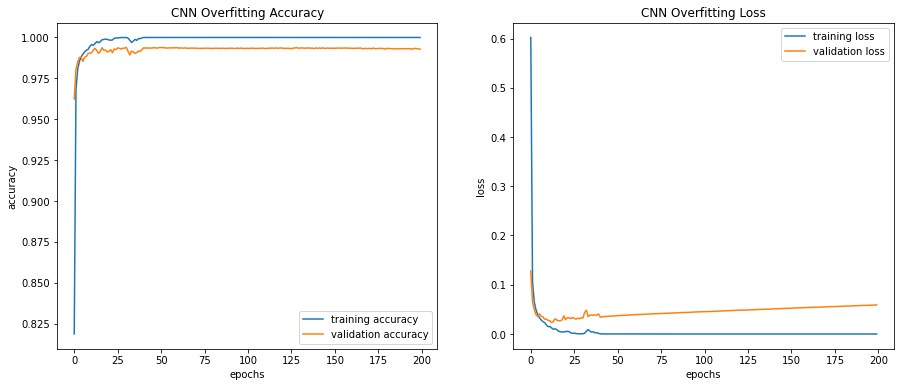

2. Overfit can learn some noise and un-needed features in the training. So, it leads to lower accuracy on unseen datasets in practice and worse generalization to other datasets. This is shown in the increasing validation loss curve after overfitting.

3. (1) We can add dropout layers in our model. (2) Increase the scale of training set. (3) Denoise the training data and augment data. (4) set conditions to stop training when it is about to overfit.

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

Dropout layers can lead to larger training loss during training in comparison with the model without dropout layers. And they can also increase the validation accuracy after training the same epochs in comparison with the original model. This indicates that dropout layers can avoid overfit somehow.

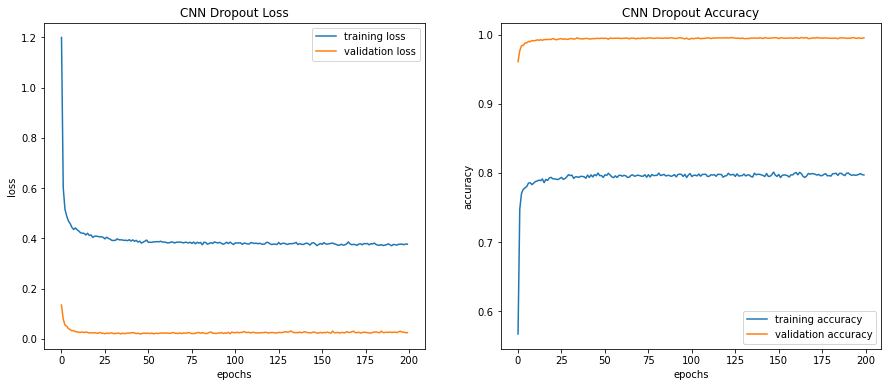

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

We can use them separately in data compression and encryption. We use the encoder part to compress data into lower dimensions and lessen memory usage. Also, in this way, data are encrypted. When the data is needed, they can only be decrypted with specific trained decoder. Then the data transfer is safe and efficient.

**2.1 Linear AE points for constructed model, no questions here.**

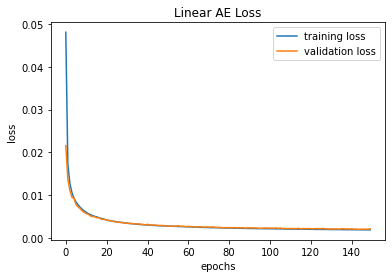

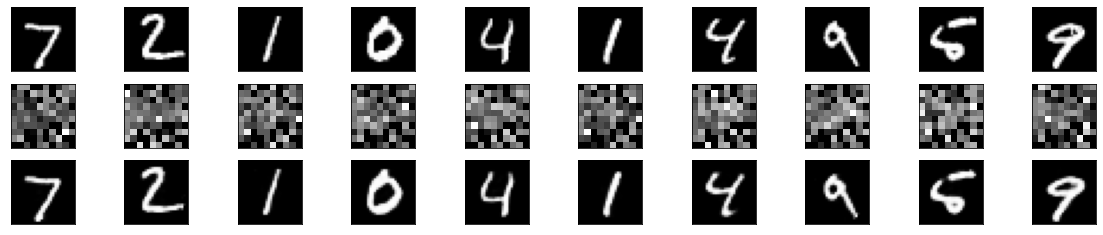

**2.2 Convolutional AE points for constructed model, no questions here.**

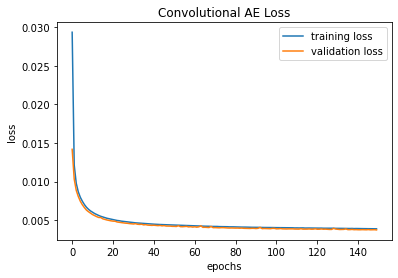

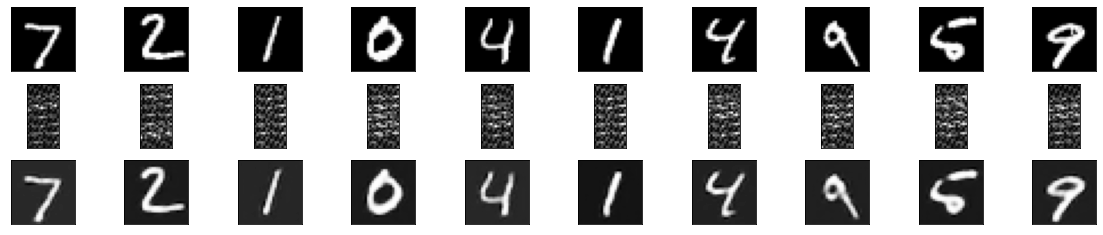

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

histogram plot
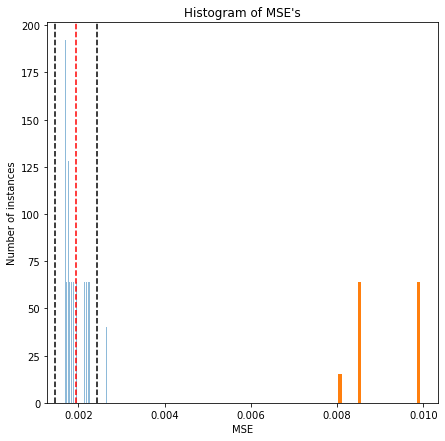

The mean of normal data is 0.0019 and standard deviation is 0.0002.  

confusion matrix:  
TP 143 	 TN 960  
FP 40 	 FN 0

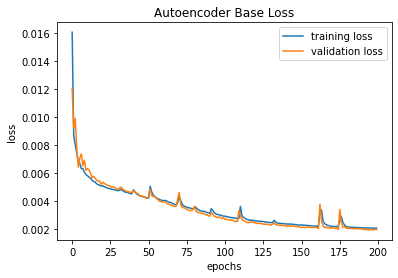

The loss is continuously decreasing during the training. And training loss and validation loss are very close to each other, because we are training autoencoder, training label is the same as training data. We also can observe some spikes in the loss curve due to oscillation in the optimization.

For design decisions regarding the model, first, the melspectrograms are images. We can use CNN to build the autoencoder dur to CNN's excellent performance on images. Then, we see that the shape of a set of example melspectrograms is (8, 64, 313); so, we set this as input shape. Considering the computational efficiency, we don't want a very complicated model; so, we set 4 CNN blocks followed by dropout layers to avoid overfit. For number of filters, the melspectrograms image size of every channel is 64x313, so, we can set the first and the last CNN layers with 128 filters each. For the intermediate layers, we set them having half of filters in outer layers, which number is 64. Due to the GPU memory limitation, we only use 50 as batch size for training. And after tried many values, we use 200 as the epoch number which can lead to nice performance and avoid overfit as well. 

***Reminder: Achieve better than 75 anomalies***

In [3]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
#Normalize
data_train = data_train/255.0
data_test = data_test/255.0
#Reshape
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [4]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    
    #### Fill in Model ####
    model = models.Sequential()
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 108us/sample - loss: 0.6021 - accuracy: 0.8187 - val_loss: 0.1280 - val_accuracy: 0.9624
Epoch 2/200
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1060 - accuracy: 0.9682 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 3/200
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 4/200
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0489 - accuracy: 0.9855 - val_loss: 0.0394 - val_accuracy: 0.9877
Epoch 5/200
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0394 - accuracy: 0.9882 - val_loss: 0.0360 - val_accuracy: 0.9880
Epoch 6/200
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0408 - val_accuracy: 0.9854
Epoch 7/200
60000/60000 [========================

In [5]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


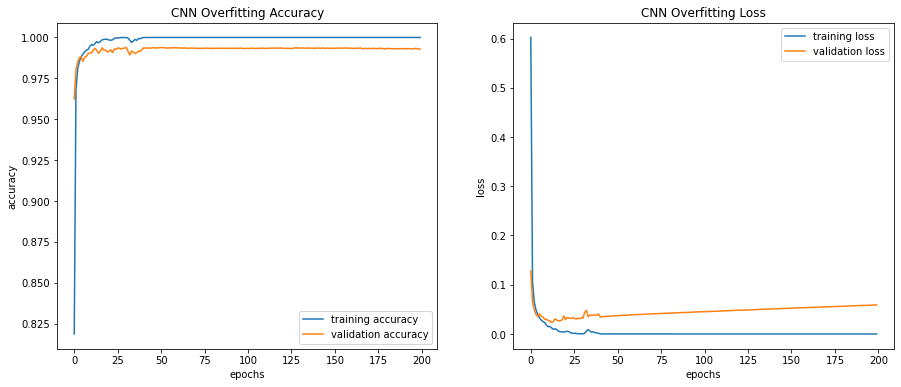

In [6]:
#Plot accuracy vs epoch
plt.figure(figsize=(15,6))
plt.subplot(121)
#### Fill in plot ####
plt.title('CNN Overfitting Accuracy') 
plt.plot(history_overfit.history['accuracy'])
plt.plot(history_overfit.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])


#Plot loss vs epoch
plt.subplot(122)

#### Fill in plot ####
plt.title('CNN Overfitting Loss') 
plt.plot(history_overfit.history['loss'])
plt.plot(history_overfit.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])
plt.show()


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [7]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = models.Sequential()
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation=None))
    model.add(layers.Dropout(0.3))
    model.add(layers.Softmax())
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 86us/sample - loss: 1.1990 - accuracy: 0.5671 - val_loss: 0.1347 - val_accuracy: 0.9608
Epoch 2/200
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6016 - accuracy: 0.7479 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 3/200
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5157 - accuracy: 0.7704 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 4/200
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4887 - accuracy: 0.7762 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 5/200
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4689 - accuracy: 0.7784 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 6/200
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4587 - accuracy: 0.7804 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 7/200
60000/60000 [=========================

(1) insert a dropout of 30% between the input and first hidden layer  
Accuracy: 98.86%

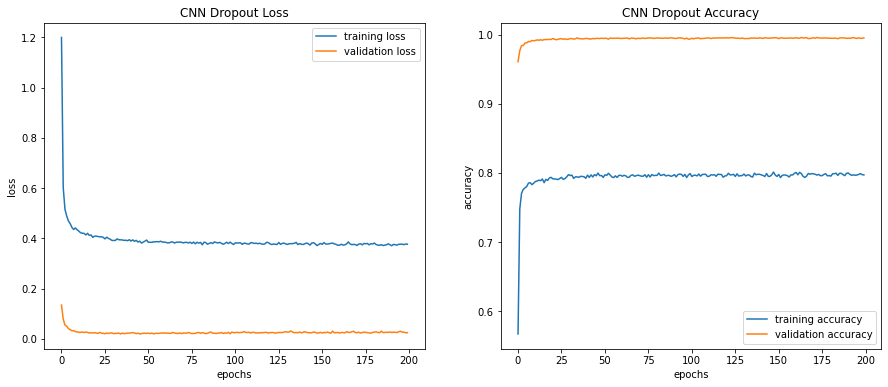

In [8]:
#Plot train/validation loss vs epoch
plt.figure(figsize=(15,6))
#Plot loss vs epoch
plt.subplot(121)

#### Fill in plot ####
plt.title('CNN Dropout Loss') 
plt.plot(history_dropout_hidden.history['loss'])
plt.plot(history_dropout_hidden.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])

#Plot accuracy vs epoch

plt.subplot(122)
#### Fill in plot ####
plt.title('CNN Dropout Accuracy') 
plt.plot(history_dropout_hidden.history['accuracy'])
plt.plot(history_dropout_hidden.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [9]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(60000, 28*28)
data_test_reshape_fcae = data_test.reshape(10000, 28*28)

In [10]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    
    #### Fill in the model ####
    model.add(layers.Input(shape=(28*28)))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    
    # Decoder
   
    #### Fill in the model ####
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss=losses.MeanSquaredError(), optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0480 - val_loss: 0.0216
Epoch 2/150
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0173 - val_loss: 0.0138
Epoch 3/150
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0127 - val_loss: 0.0112
Epoch 4/150
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0106 - val_loss: 0.0095
Epoch 5/150
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0093 - val_loss: 0.0093
Epoch 6/150
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0085 - val_loss: 0.0078
Epoch 7/150
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0078 - val_loss: 0.0073
Epoch 8/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0072 - val_loss: 0.0069
Epoch 9/150
60000/60000 [==============================] - 1s 25us/sample - loss: 0.00

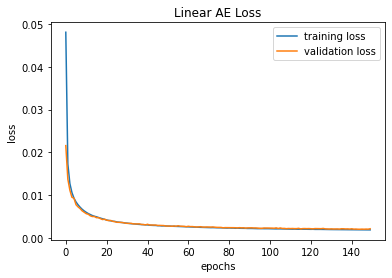

In [11]:
#Plot train/validation loss vs epoch
plt.figure()
#Plot loss vs epoch

#### Fill in plot ####
plt.title('Linear AE Loss') 
plt.plot(history_deep_ae.history['loss'])
plt.plot(history_deep_ae.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])
plt.show()

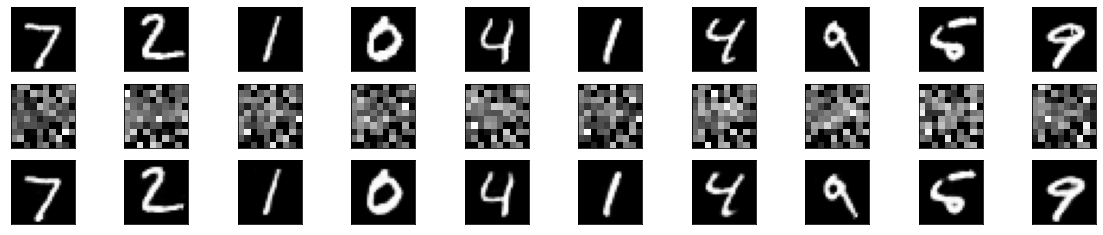

In [12]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Set the dropout rate at 30% if the dropout layer is used (optional, not required).
<br>  Train for 200 epochs**

In [13]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(60000, 28, 28, 1)
data_test_reshape_cae = data_test.reshape(10000, 28, 28, 1)

In [14]:
#Create Convolutional AutoEncoder Architecture
def cae():
    
    model = models.Sequential()
    
    #Encoder
    
    #### Fill in model ####
    model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    #Decoder
    
    #### Fill in model ####
    model.add(layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2D(1, kernel_size=(3, 3), activation='tanh', padding='same'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss=losses.MeanSquaredError(), optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1

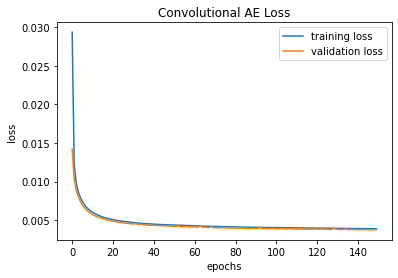

In [15]:
#Plot train/validation loss vs epoch
plt.title('Convolutional AE Loss') 
plt.plot(history_conv_ae.history['loss'])
plt.plot(history_conv_ae.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])
plt.show()

<Figure size 432x288 with 0 Axes>

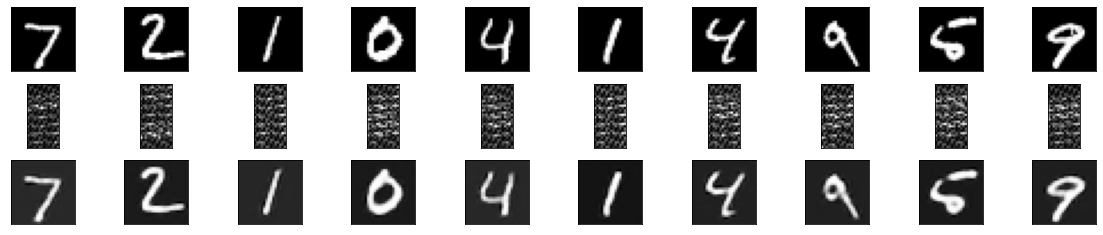

In [16]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [1]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

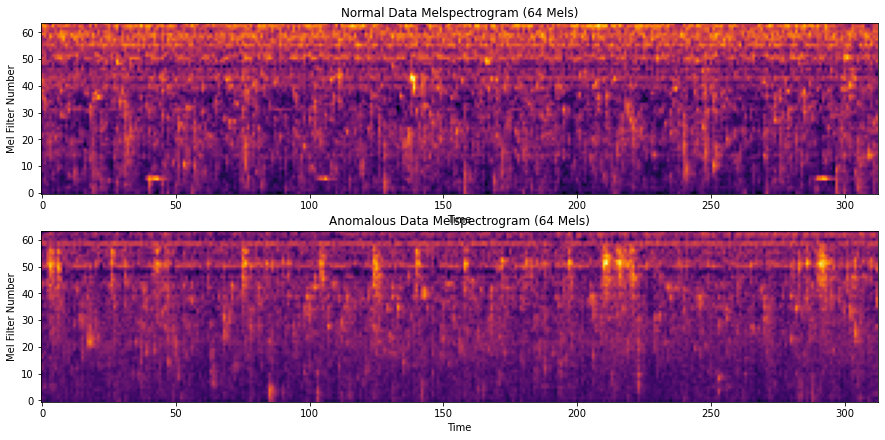

In [2]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [3]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
autoencoderBASE = tf.keras.models.Sequential([
    
#   tf.keras.layers.Input(shape=(8, 64, 313)),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(400, activation='relu'),
#   tf.keras.layers.Dense(200, activation='relu'),
#   tf.keras.layers.Dense(100, activation='relu'),

#     # Decoder
#   tf.keras.layers.Dense(200, activation='relu'),
#   tf.keras.layers.Dense(400, activation='relu'),
#   tf.keras.layers.Dense(8*64*313, activation='tanh'),
#   tf.keras.layers.Reshape((8, 64, 313))

    # Encoder
    tf.keras.layers.Input(shape=(8, 64, 313)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    #Decoder
    
    #### Fill in model ####
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu',padding='same'),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(313, kernel_size=5, activation='sigmoid', padding='same'),

])
print(autoencoderBASE.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 64, 128)        1001728   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 32, 128)        0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 32, 128)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 32, 64)         204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 16, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 16, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 16, 64)         1

In [4]:
# Load data
normal_data  = np.load('./training_data.npy')
anomaly_data = np.load('./test_data.npy')
train_data1, val_data1, train_data2, val_data2 = train_test_split(
    normal_data, normal_data, test_size=0.2, random_state=20
)

In [5]:
#### General steps to follow
# Set up the data (reshape, scale, etc...
# train_data1 = tf.transpose(train_data1,[0,2,3,1])
# val_data1 = tf.transpose(val_data1,[0,2,3,1])
min_val = tf.reduce_min(train_data1)
max_val = tf.reduce_max(train_data1)
train_data1 = (train_data1 - min_val) / (max_val - min_val)
val_data1 = (val_data1 - min_val) / (max_val - min_val)
min_val2 = tf.reduce_min(anomaly_data)
max_val2 = tf.reduce_max(anomaly_data)
anomaly_data = (anomaly_data - min_val2) / (max_val2 - min_val2)
# Initialize a loss function
loss_fun = tf.keras.losses.MeanSquaredError()
# Compile a model
autoencoderBASE.compile(loss=loss_fun, optimizer='adam')

# Train a model
history_autoencoderBASE = autoencoderBASE.fit(train_data1, train_data1, validation_data=(val_data1, val_data1), epochs=200, batch_size=50, shuffle=True)
prediction_data = autoencoderBASE.predict(anomaly_data)


Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 29s 36ms/sample - loss: 0.0161 - val_loss: 0.0120
Epoch 2/200
800/800 [==============================] - 19s 23ms/sample - loss: 0.0087 - val_loss: 0.0092
Epoch 3/200
800/800 [==============================] - 18s 23ms/sample - loss: 0.0080 - val_loss: 0.0099
Epoch 4/200
800/800 [==============================] - 18s 23ms/sample - loss: 0.0075 - val_loss: 0.0077
Epoch 5/200
800/800 [==============================] - 18s 22ms/sample - loss: 0.0068 - val_loss: 0.0064
Epoch 6/200
800/800 [==============================] - 18s 23ms/sample - loss: 0.0067 - val_loss: 0.0071
Epoch 7/200
800/800 [==============================] - 19s 23ms/sample - loss: 0.0063 - val_loss: 0.0074
Epoch 8/200
800/800 [==============================] - 18s 22ms/sample - loss: 0.0063 - val_loss: 0.0065
Epoch 9/200
800/800 [==============================] - 18s 22ms/sample - loss: 0.0061 - val_loss: 0.0069
Epoch 10/

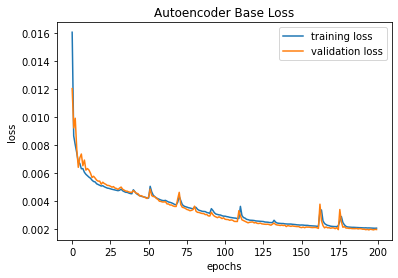

In [6]:
# Plot loss versus epoch.
plt.title('Autoencoder Base Loss') 
plt.plot(history_autoencoderBASE.history['loss'])
plt.plot(history_autoencoderBASE.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])
plt.show()

The mean of normal data is 0.0019        and standard deviation is 0.0002


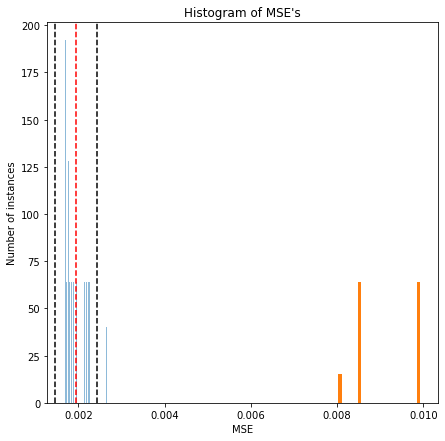

In [11]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
# train_data1 = tf.transpose(train_data1,[0,2,3,1])
# val_data1 = tf.transpose(val_data1,[0,2,3,1])
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((train_data1,val_data1))))
lossMSE = tf.keras.losses.MeanSquaredError()
for i, batch in dataset.enumerate():
    batch = tf.expand_dims(batch, 0, name=None)
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(anomaly_data))
for i, batch in anomset.enumerate():
    batch = tf.expand_dims(batch, 0, name=None)
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [13]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
fn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
tn_count = 1000 - fp_count

print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')

TP 143 	 TN 960
FP 40 	 FN 0
